## <center>The Sparks Foundation</center>
### <center>TASK #5 - Exploratory Data Analysis - Sports</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

#### Objective:
    1. Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'.
    2. As a sports analyst, find out most successful teams, player and factors contributing win or loss of a team.
    3. Suggest teams or players a company should endorse for its products.

In [81]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [82]:
# Set the working directory
import io
%cd "E:\TSF-INTERN\TSF-INTERN Tasks\Task#5\Indian Premier League"

E:\TSF-INTERN\TSF-INTERN Tasks\Task#5\Indian Premier League


In [83]:
# Load the data
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [84]:
# Check first 5 records
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [85]:
# column names
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

As there is already a column which gives total of 'extra_runs' we will drop the columns 'wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'

In [86]:
# dropping unnecessary columns from deliveries dataframe
deliveries = deliveries.drop(['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs'],axis=1)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,0,2,2,NaN,NaN,NaN


In [87]:
# check dimension of the data
deliveries.shape

(179078, 16)

In [88]:
# datatypes present in our data
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [89]:
# Descriptive statistics
deliveries.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
match_id,179078.0,NaN,NaN,NaN,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,NaN,NaN,NaN,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
batting_team,179078,15,Mumbai Indians,22619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team,179078,15,Mumbai Indians,22517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over,179078.0,NaN,NaN,NaN,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,NaN,NaN,NaN,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
batsman,179078,516,V Kohli,4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,179078,511,SK Raina,4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,179078,405,Harbhajan Singh,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_super_over,179078.0,NaN,NaN,NaN,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0


In [90]:
# Concise summmary of dataframe
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  batsman_runs      179078 non-null  int64 
 11  extra_runs        179078 non-null  int64 
 12  total_runs        179078 non-null  int64 
 13  player_dismissed  8834 non-null    object
 14  dismissal_kind    8834 non-null    object
 15  fielder           6448 non-null    object
dtypes: int64(8), object(8)
memory usage: 2

In [91]:
# Check first 5 records
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [92]:
# column names
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [93]:
# check dimension of the data
matches.shape

(756, 18)

In [94]:
# datatypes present in our data
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [95]:
# Descriptive statistics
matches.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,756.0,NaN,NaN,NaN,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,NaN,NaN,NaN,2013.444444,3.366895,2008.0,2011.0,2013.0,2016.0,2019.0
city,749,32,Mumbai,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,756,546,2011-04-17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team1,756,15,Mumbai Indians,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team2,756,15,Royal Challengers Bangalore,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_winner,756,15,Mumbai Indians,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_decision,756,2,field,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,756,3,normal,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dl_applied,756.0,NaN,NaN,NaN,0.025132,0.15663,0.0,0.0,0.0,0.0,1.0


In [96]:
# Concise summary of the dataframe
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [97]:
# check if id column is unique
matches.id.is_unique

True

In [98]:
# now we can use this as index
matches.set_index('id',inplace=True)

In [99]:
# Check for null values
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [100]:
# Check which city values are null
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


We can replce this values by 'Dubai'

In [101]:
# replacing null values by 'Dubai'
matches.city.fillna('Dubai',inplace=True)

In [102]:
matches.groupby(['city','venue']).count()['season']

city            venue                                               
Abu Dhabi       Sheikh Zayed Stadium                                     7
Ahmedabad       Sardar Patel Stadium, Motera                            12
Bangalore       M Chinnaswamy Stadium                                   66
Bengaluru       M Chinnaswamy Stadium                                    7
                M. Chinnaswamy Stadium                                   7
Bloemfontein    OUTsurance Oval                                          2
Cape Town       Newlands                                                 7
Centurion       SuperSport Park                                         12
Chandigarh      Punjab Cricket Association IS Bindra Stadium, Mohali    11
                Punjab Cricket Association Stadium, Mohali              35
Chennai         M. A. Chidambaram Stadium                                8
                MA Chidambaram Stadium, Chepauk                         49
Cuttack         Barabati Stadiu

As you can see above that there are duplicate values like 'Bangalore' 'Bengaluru' then 'Chandigarh' and 'Mohali' has same stadium name 'Punjab Cricket Association Stadium, Mohali'. Also 'Maharashtra Cricket Association Stadium' is now named as 'Subrata Roy Sahara Stadium'.So we will correct this type of data using the replace function.

In [103]:
# replace city
matches.city.replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
matches.city.replace(to_replace='Chandigarh',value='Mohali',inplace=True)

In [104]:
# replace venue
matches.venue.replace(to_replace='M. Chinnaswamy Stadium',value='M Chinnaswamy Stadium',inplace=True)
matches.venue.replace(to_replace='MA Chidambaram Stadium, Chepauk',value='M. A. Chidambaram Stadium',inplace=True)
matches.venue.replace(to_replace='Feroz Shah Kotla Ground',value='Feroz Shah Kotla',inplace=True)
matches.venue.replace(to_replace='Rajiv Gandhi Intl. Cricket Stadium',value='Rajiv Gandhi International Stadium, Uppal',
                  inplace=True)
matches.venue.replace(to_replace='IS Bindra Stadium',value='Punjab Cricket Association Stadium, Mohali',inplace=True)
matches.venue.replace(to_replace='Punjab Cricket Association IS Bindra Stadium, Mohali',
                  value='Punjab Cricket Association Stadium, Mohali',inplace=True)
matches.venue.replace(to_replace='Maharashtra Cricket Association Stadium',value='Subrata Roy Sahara Stadium',inplace=True)
matches.venue.replace(to_replace='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',value='ACA-VDCA Stadium',inplace=True)

In [105]:
# City and venue/Stadium
matches.groupby(['city','venue']).count()['season']

city            venue                                           
Abu Dhabi       Sheikh Zayed Stadium                                 7
Ahmedabad       Sardar Patel Stadium, Motera                        12
Bangalore       M Chinnaswamy Stadium                               80
Bloemfontein    OUTsurance Oval                                      2
Cape Town       Newlands                                             7
Centurion       SuperSport Park                                     12
Chennai         M. A. Chidambaram Stadium                           57
Cuttack         Barabati Stadium                                     7
Delhi           Feroz Shah Kotla                                    74
Dharamsala      Himachal Pradesh Cricket Association Stadium         9
Dubai           Dubai International Cricket Stadium                  7
Durban          Kingsmead                                           15
East London     Buffalo Park                                         3
Hyderabad   

In [106]:
pd.set_option('display.max_columns',50) # to see all the column data

Now we will merge this two dataframes

In [107]:
# Merging the two dataframes into one
IPL = pd.merge(deliveries,matches,left_on='match_id',right_on='id')
IPL.head() # check first 5 records

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4,0,4,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,0,2,2,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [108]:
# column names
IPL.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [109]:
# dimension of the data
IPL.shape

(179078, 33)

In [110]:
# datatypes present in data
IPL.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3             object
dtype: object

In [111]:
# Descriptive Statistics
IPL.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
match_id,179078.0,NaN,NaN,NaN,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,NaN,NaN,NaN,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
batting_team,179078,15,Mumbai Indians,22619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team,179078,15,Mumbai Indians,22517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over,179078.0,NaN,NaN,NaN,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,NaN,NaN,NaN,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
batsman,179078,516,V Kohli,4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,179078,511,SK Raina,4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,179078,405,Harbhajan Singh,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_super_over,179078.0,NaN,NaN,NaN,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0


In [112]:
# Concise summary of data
IPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  batsman_runs      179078 non-null  int64 
 11  extra_runs        179078 non-null  int64 
 12  total_runs        179078 non-null  int64 
 13  player_dismissed  8834 non-null    object
 14  dismissal_kind    8834 non-null    object
 15  fielder           6448 non-null    object
 16  season            179078 non-null  int

In [113]:
# check for null values
IPL.isnull().sum().sort_values(ascending=False)

fielder             172630
dismissal_kind      170244
player_dismissed    170244
umpire3             150712
umpire2                500
umpire1                500
player_of_match        372
winner                 372
toss_decision            0
team2                    0
toss_winner              0
dl_applied               0
result                   0
date                     0
win_by_runs              0
win_by_wickets           0
venue                    0
team1                    0
match_id                 0
city                     0
inning                   0
total_runs               0
extra_runs               0
batsman_runs             0
is_super_over            0
bowler                   0
non_striker              0
batsman                  0
ball                     0
over                     0
bowling_team             0
batting_team             0
season                   0
dtype: int64

As we can see that there are null values in our data and it may be because of matches which were a tie, no result etc.

Now we will drop the 'umpire3' column as it has a lot of missing values.

In [114]:
IPL = IPL.drop(['umpire3'],axis=1)

In [115]:
IPL.to_csv('IPL_Data.csv') # Save data to local drive

#### Now to perform EDA on our data we have to do it on matches dataframe and IPL dataframe accordingly

### What is the Count of Number of Matches played in each Season ?

Here we have to use matches dataframe

In [116]:
# Number of matches played in each season
matches.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

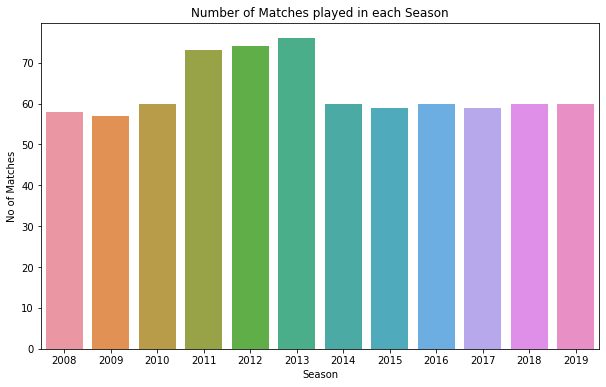

In [117]:
# Number of matches played in each season
plt.figure(figsize=(10,6))
sns.countplot(x='season',data=matches)
plt.xlabel('Season')
plt.ylabel('No of Matches')
plt.title('Number of Matches played in each Season')
plt.show()

Here we can see that maximum number of <b>Matches</b> are played during <b>Season - 2011 to 2013.</b>

### How many Teams played in each Season ?

In [118]:
# Number of teams played in each season
match_data = matches.groupby(['season'])[['team1']].nunique()
match_data

,team1
season,
2008,8
2009,8
2010,8
2011,10
2012,9
2013,9
2014,8
2015,8
2016,8


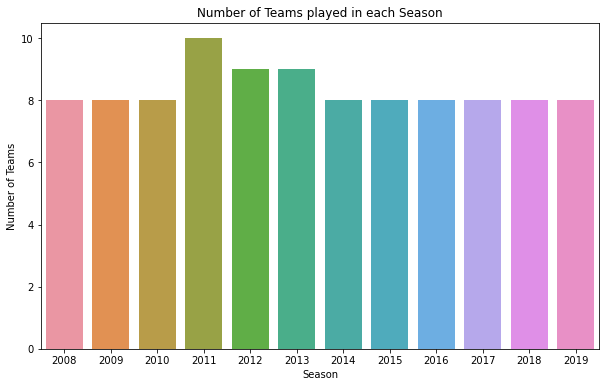

In [119]:
# Number of teams played in each season
plt.figure(figsize=(10,6))
sns.barplot(x=match_data.index,y=match_data.team1)
plt.xlabel('Season')
plt.ylabel('Number of Teams')
plt.title('Number of Teams played in each Season')
plt.show()

From above we can say that <b>Season 2011 to 2013</b> has maximum number of <b>Teams.</b>

### Which Venue/Stadium hosted maximum number of Matches ?

In [120]:
# Venue vs Number of Matches
venue_data = matches.venue.value_counts()
venue_data

M Chinnaswamy Stadium                               80
Eden Gardens                                        77
Feroz Shah Kotla                                    74
Wankhede Stadium                                    73
Rajiv Gandhi International Stadium, Uppal           64
M. A. Chidambaram Stadium                           57
Punjab Cricket Association Stadium, Mohali          56
Sawai Mansingh Stadium                              47
Subrata Roy Sahara Stadium                          38
Dr DY Patil Sports Academy                          17
Kingsmead                                           15
ACA-VDCA Stadium                                    13
Sardar Patel Stadium, Motera                        12
SuperSport Park                                     12
Brabourne Stadium                                   11
Saurashtra Cricket Association Stadium              10
Himachal Pradesh Cricket Association Stadium         9
Holkar Cricket Stadium                               9
New Wander

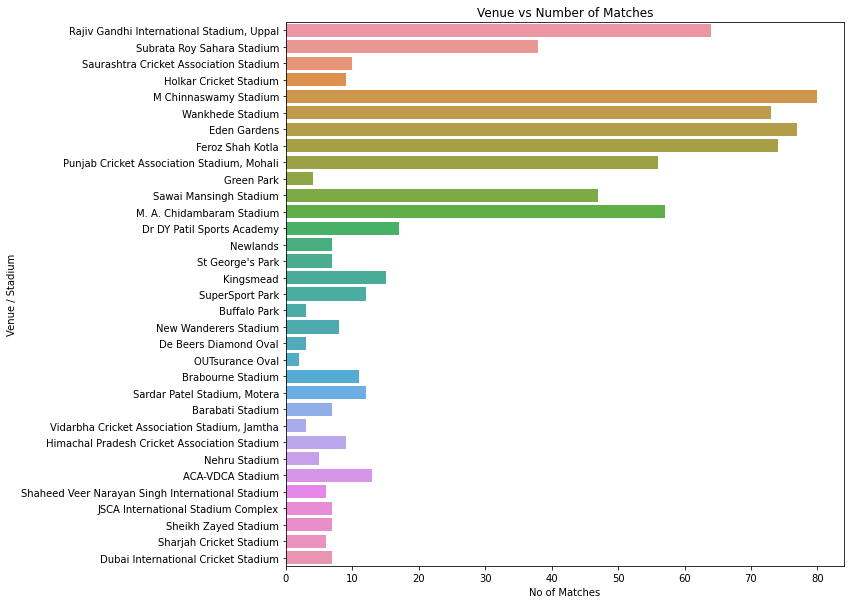

In [121]:
# Venue vs Number of Matches
plt.figure(figsize=(10,10))
sns.countplot(y='venue',data=matches)
plt.xlabel('No of Matches')
plt.ylabel('Venue / Stadium')
plt.title('Venue vs Number of Matches')
plt.show()

From above countplot we can say that <b>M Chinnaswamy Stadium</b> has hosted maximum number of <b>IPL Matches - 80.</b>

### What is the Total number of Runs scored in each Season ?

In [122]:
# Total Runs scored in each Season
season_total = IPL.groupby(['season'])[['total_runs']].sum()
season_total

,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


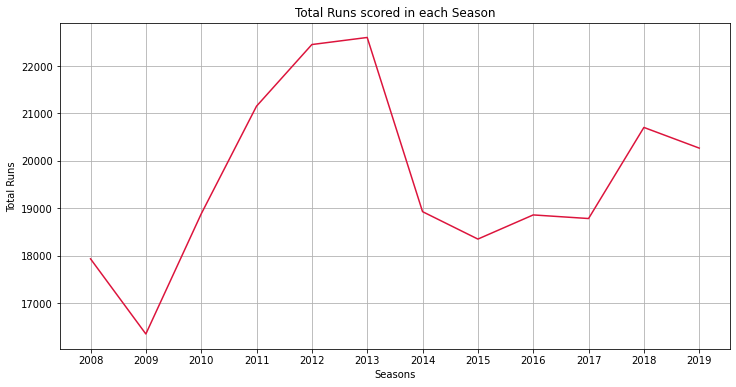

In [123]:
# Total Runs scored in each Season
plt.figure(figsize=(12,6))
sns.lineplot(x=season_total.index,y=season_total.total_runs,data=season_total,color='crimson')
plt.xlabel('Seasons')
plt.xticks(season_total.index)
plt.ylabel('Total Runs')
plt.title('Total Runs scored in each Season')
plt.grid()
plt.show()

Here we can see that maximum number of <b>Runs</b> are scored in the <b>Season - 2013 - 22602 runs.</b>

### How many Number of Matches are won by each Team ?

In [124]:
# Number of matches won by each team
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

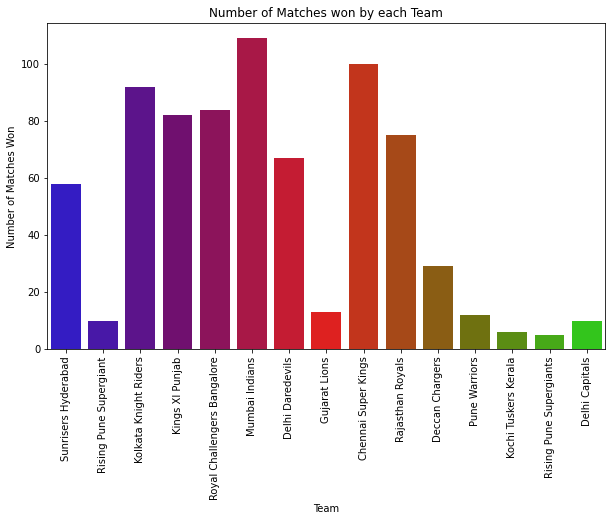

In [125]:
# Number of matches won by each team
plt.figure(figsize=(10,6))
sns.countplot(x='winner',data=matches,palette='brg')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.ylabel('Number of Matches Won')
plt.title('Number of Matches won by each Team')
plt.show()

Here we can say that <b>Mumbai Indians</b> has won maximum number of <b>Matches - 109.</b>

### Winner in each season

In [126]:
winner_data = matches.drop_duplicates(subset=['season'],
                                      keep='last')[['season','winner']].sort_values(by='season').reset_index(drop=True)
winner_data

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


Above table gives the details of Winning Team in each Season.

### Which team won maximum IPL Titles ?

In [127]:
# Maximum IPL title winner
max_win_ipl = winner_data.winner.value_counts()
max_win_ipl

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

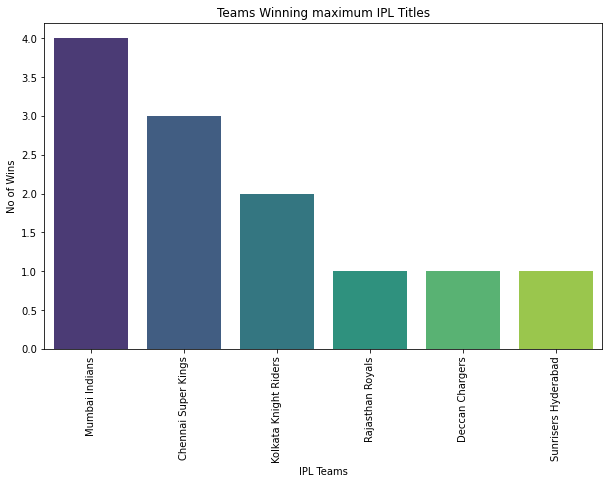

In [128]:
# Teams Winning maximum IPL Titles
plt.figure(figsize=(10,6))
sns.barplot(x=max_win_ipl.index,y=max_win_ipl, palette='viridis')
plt.xlabel('IPL Teams')
plt.xticks(rotation=90)
plt.ylabel('No of Wins')
plt.title('Teams Winning maximum IPL Titles')
plt.show()

From above analysis we can say that <b>Mumbai Indians</b> has won maximum <b>IPL Titles - 4 times.</b>

Sunrisers Hyderabad replaced the Deccan Chargers in 2012 and debuted in 2013. so we can say that Hyderabad has won 2 IPL titles.

### Toss Decision and its Effect on Match Result 

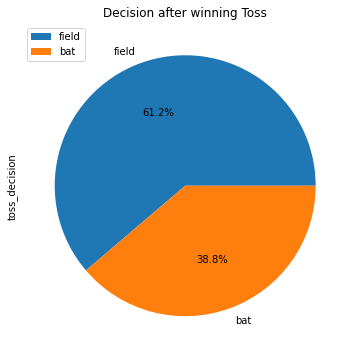

In [129]:
# Decision after winning toss
matches.toss_decision.value_counts().plot(kind='pie', autopct='%3.1f%%',figsize=(10,6),legend=True)
plt.title('Decision after winning Toss')
plt.legend(loc='upper left')
plt.show()

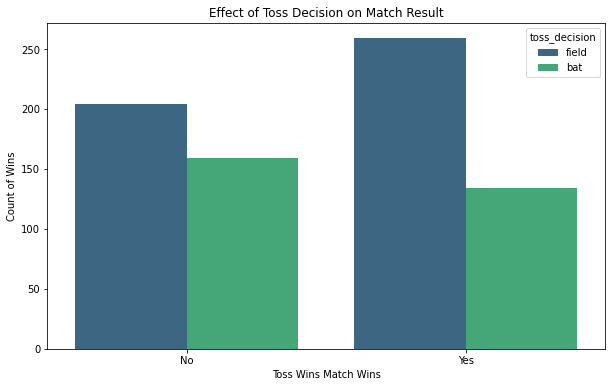

In [130]:
# Effect of Toss Decision on Match Result
matches['toss_match_win'] = np.where((matches.toss_winner==matches.winner),'Yes','No')

plt.figure(figsize=(10,6))
sns.countplot(x='toss_match_win',data=matches,hue='toss_decision',palette='viridis')
plt.xlabel('Toss Wins Match Wins')
plt.ylabel('Count of Wins')
plt.title('Effect of Toss Decision on Match Result')
plt.show()

As per above analysis <b>Field</b> is the option which was chosen maximum times after winning a <b>Toss</b> and Teams winning the Toss and elected to Field first have won maximum matches.

### Maximum number of Man of the Match Awards

In [131]:
# Maximum number of Man of the Match Awards
MOM = matches.player_of_match.value_counts().head(10)
MOM

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

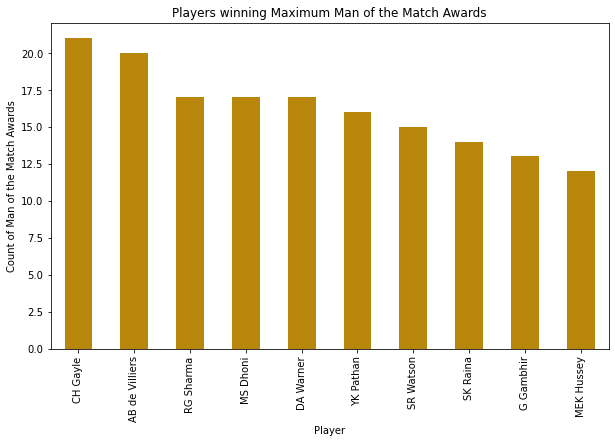

In [132]:
# Maximum number of Man of the Match Awards
MOM.plot(kind='bar',figsize=(10,6),color='darkgoldenrod')
plt.xlabel('Player')
plt.ylabel('Count of Man of the Match Awards')
plt.title('Players winning Maximum Man of the Match Awards')
plt.show()

From above analysis we can say that <b>Chris Gayle</b> has won maximum <b>Man of the Match Awards - 21 times.</b>

### Players who scored maximum runs, maximum sixes, maximum fours throughout all season

Here we have to use IPL dataframe

### Players with Maximum Runs

In [133]:
# Players with maximum runs
max_runs = IPL.groupby(['batsman'])[['batsman_runs']].sum().sort_values(ascending=False,by='batsman_runs').head(10)
max_runs

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


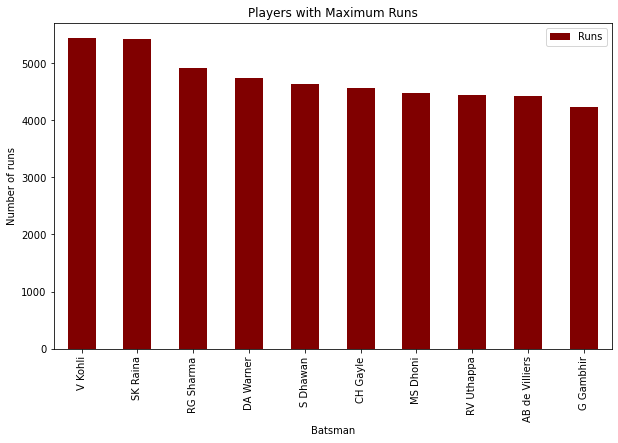

In [134]:
# Players with maximum runs
max_runs.plot(kind='bar',figsize=(10,6),color = 'maroon')
plt.xlabel('Batsman')
plt.ylabel('Number of runs')
plt.title('Players with Maximum Runs')
plt.legend(['Runs'])
plt.show()

### Players with Maximum number of Sixes

In [135]:
# Players with Maximum number of Sixes
sixes = IPL[IPL.batsman_runs==6]

In [136]:
# Players with Maximum number of Sixes
sixes = sixes.groupby(['batsman'])[['batsman_runs']].count().sort_values(ascending=False,by='batsman_runs').head(10)
sixes

,batsman_runs
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


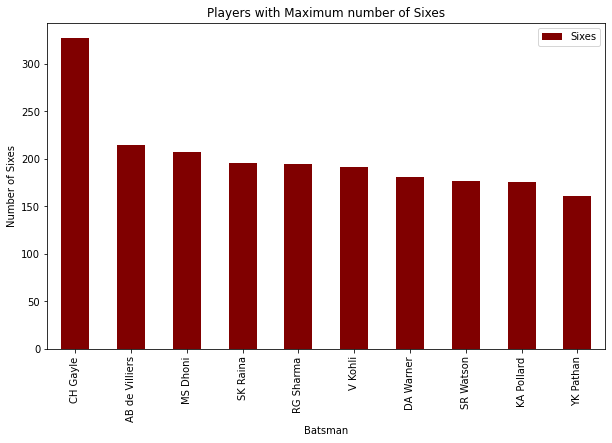

In [137]:
# Players with Maximum number of Sixes
sixes.plot(kind='bar',figsize=(10,6),color = 'maroon')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.title('Players with Maximum number of Sixes')
plt.legend(['Sixes'])
plt.show()

### Players with Maximum number of Fours

In [138]:
# Players with Maximum number of Fours
fours = IPL[IPL.batsman_runs==4]

In [139]:
# Players with Maximum number of Fours
fours = fours.groupby(['batsman'])[['batsman_runs']].count().sort_values(ascending=False,by='batsman_runs').head(10)
fours

,batsman_runs
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,376


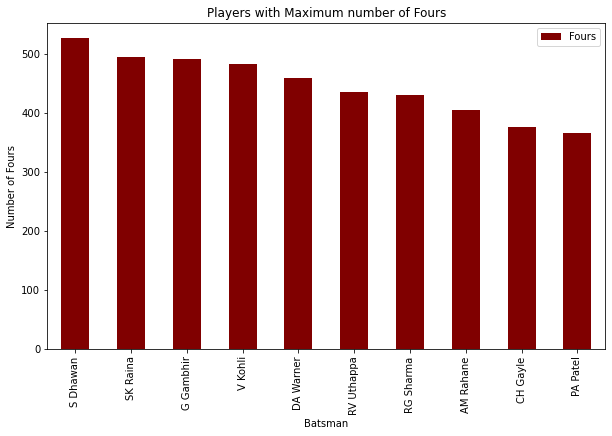

In [140]:
# Players with Maximum number of Fours
fours.plot(kind='bar',figsize=(10,6),color = 'maroon')
plt.xlabel('Batsman')
plt.ylabel('Number of Fours')
plt.title('Players with Maximum number of Fours')
plt.legend(['Fours'])
plt.show()

From above analysis we can say that <b>Virat Kohli</b> Scored <b>Maximum Runs - 5434</b>, <b>Chris Gayle</b> has hitted <b>Maximum Sixes - 327 </b> and <b>Shikhar Dhawan</b> has hitted <b>Maximum Fours - 526.</b>

### Highest Strike Rate of Batsman who played atleast 10 to 12 seasons

In [141]:
#total number of matches played by each batsman
no_balls = pd.DataFrame(IPL.groupby(['batsman'])[['ball']].count())

# total runs scored by each batsman
runs = pd.DataFrame(IPL.groupby(['batsman'])[['batsman_runs']].sum())

# Number of Season each batsman played
seasons = pd.DataFrame(IPL.groupby('batsman')['season'].nunique())

batting_data = pd.DataFrame({'balls':no_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batting_data.reset_index(inplace=True)

batting_data['strike_rate'] = batting_data['run']/batting_data['balls']*100

strike_rate_data = batting_data[batting_data.season.isin([10,11,12])][['season',
                                                                    'batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                          ascending = False)
strike_rate_data.head(10)

,season,batsman,strike_rate
26,12,AB de Villiers,148.740343
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
509,12,YK Pathan,138.860326
444,11,SR Watson,136.945813
290,12,MS Dhoni,134.930681
428,12,SK Raina,133.902077
166,12,Harbhajan Singh,131.962025
486,12,V Kohli,129.042983


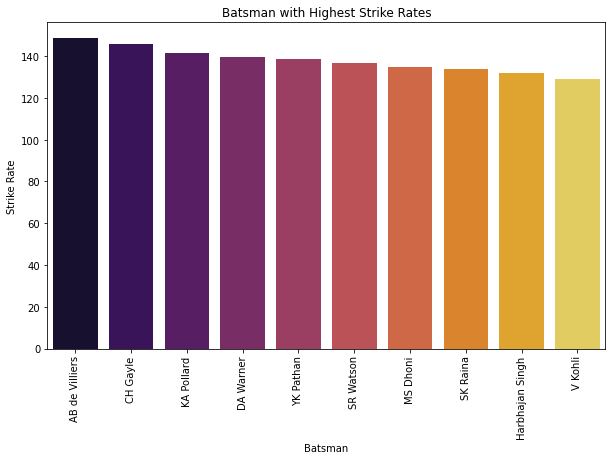

In [142]:
# Batsman with Highest Strike Rates
plt.figure(figsize=(10,6))
sns.barplot(x='batsman',y='strike_rate',data=strike_rate_data.head(10),palette='inferno')
plt.xlabel('Batsman')
plt.xticks(rotation=90)
plt.ylabel('Strike Rate')
plt.title('Batsman with Highest Strike Rates')
plt.show()

From above analysis we can say that <b>AB de Villiers</b> has maximum <b>Strike Rate - 148.74.</b>

### Most Consistent Batsman

In [143]:
# Most Consistent Batsman
consistent = IPL[IPL['batsman'].isin(max_runs.index)][['season','batsman','batsman_runs']]
consistent = consistent.groupby(['season','batsman'])[['batsman_runs']].sum().reset_index()

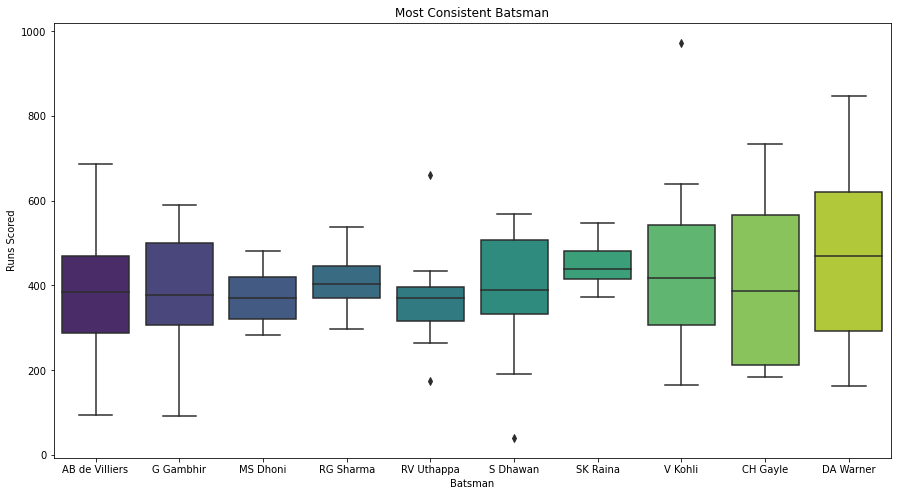

In [144]:
# Most Consistent Batsman
plt.figure(figsize=(15,8))
sns.boxplot(x=consistent.batsman,y=consistent.batsman_runs,palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.title('Most Consistent Batsman')
plt.show()

From above boxplots we can clearly see that <b>Suresh Raina</b> is the most <b>Consistent</b> batsman.

### What are the different ways that a batsman is dismissed in IPL ? Which bowler gave maximum number of extra runs ? Which bowler took highest number of Wickets ? Which bowler has best bowling average ?

In [145]:
# Different ways of Dismissal in IPL
dismiss = IPL.dismissal_kind.value_counts()
dismiss

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

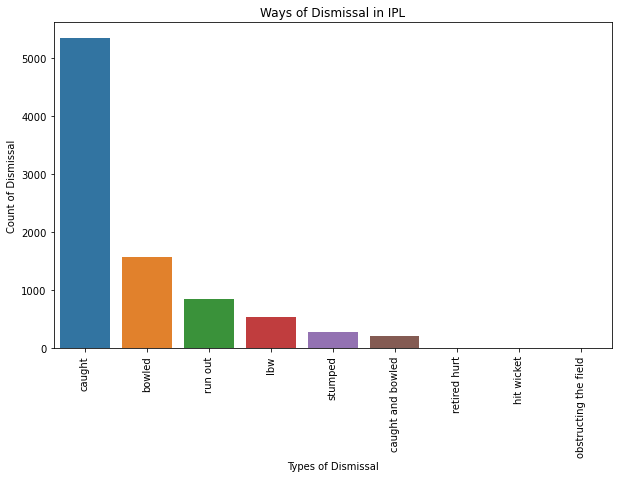

In [146]:
# Ways of Dismissal in IPL
plt.figure(figsize=(10,6))
sns.barplot(x=dismiss.index,y=dismiss)
plt.xlabel('Types of Dismissal')
plt.xticks(rotation=90)
plt.ylabel('Count of Dismissal')
plt.title('Ways of Dismissal in IPL')
plt.show()

We know that bowlers get credit for the folowing types of dismissal ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']. So we will first filter our data according to this to get which bowler took maximum wickets.

In [147]:
bowler_account = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [148]:
# Maximum Wicket Takers
bowler_data = IPL[IPL.dismissal_kind.isin(bowler_account)]

max_wickets = bowler_data.groupby(['bowler'])[['dismissal_kind']].count().sort_values(ascending=False,
                                                                                      by='dismissal_kind').head(10)
max_wickets

,dismissal_kind
bowler,
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119


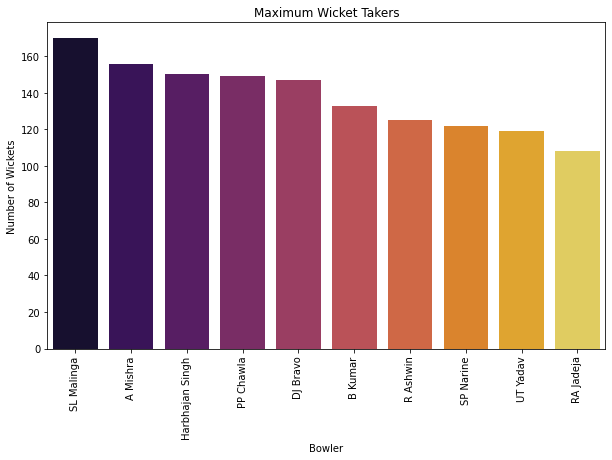

In [149]:
# Maximum wicket takers
plt.figure(figsize=(10,6))
sns.barplot(x=max_wickets.index,y=max_wickets.dismissal_kind,palette='inferno')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.ylabel('Number of Wickets')
plt.title('Maximum Wicket Takers')
plt.show()

In [150]:
max_extra = IPL.groupby(['bowler'])[['extra_runs']].sum().sort_values(ascending=False,by='extra_runs').head(10)
max_extra

,extra_runs
bowler,
SL Malinga,293
P Kumar,236
UT Yadav,219
DJ Bravo,201
B Kumar,197
I Sharma,194
RP Singh,181
DW Steyn,171
SR Watson,171


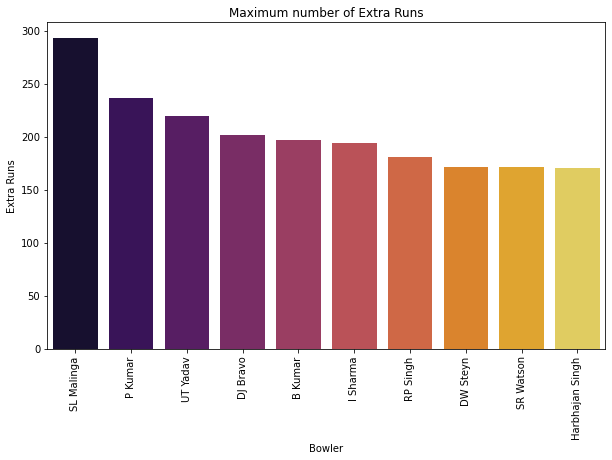

In [151]:
# Maximum extra runs
plt.figure(figsize=(10,6))
sns.barplot(x=max_extra.index,y='extra_runs',data=max_extra,palette='inferno')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.ylabel('Extra Runs')
plt.title('Maximum number of Extra Runs')
plt.show()

In [152]:
# Here we will take all kinds of dismissal types into bowlers account
balls_bowled = pd.DataFrame(IPL.groupby('bowler')['total_runs'].sum())
wickets_taken = pd.DataFrame(IPL.groupby('bowler')['dismissal_kind'].count())
bowling_average = pd.DataFrame({'runs':balls_bowled['total_runs'],'wickets':wickets_taken['dismissal_kind']})
bowling_average.reset_index(inplace = True)

In [153]:
bowling_average['average'] = bowling_average['runs']/bowling_average['wickets']
bowling_average = bowling_average[bowling_average['wickets']>50].sort_values(ascending=True,by='average')
bowling_average.head(10)

,bowler,runs,wickets,average
340,SL Malinga,3511,188,18.675532
134,Imran Tahir,1656,82,20.195122
301,Rashid Khan,1257,60,20.950000
9,A Nehra,2537,121,20.966942
225,MM Patel,1733,82,21.134146
347,SP Narine,2939,137,21.452555
358,Sandeep Sharma,1967,90,21.855556
93,DJ Bravo,3733,168,22.220238
74,CH Morris,1793,78,22.987179
53,B Kumar,3264,141,23.148936


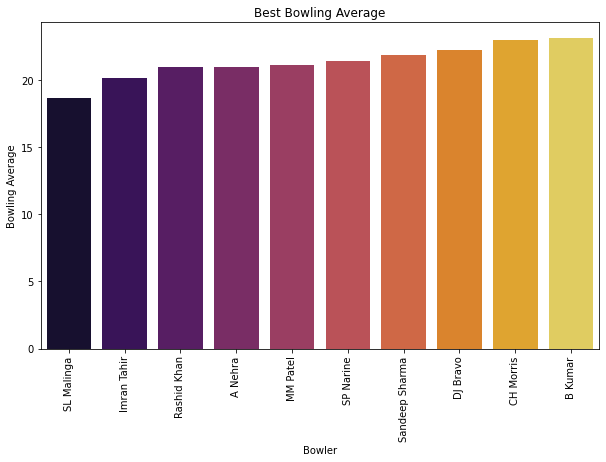

In [154]:
# Best Bowling Average
plt.figure(figsize=(10,6))
sns.barplot(x='bowler',y='average',data=bowling_average.head(10),palette='inferno')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.ylabel('Bowling Average')
plt.title('Best Bowling Average')
plt.show()

As per above analysis, we can say that the maximum times a batsman got dismissed is by <b>Dismissal Type - 'Caught'</b> and <b>Lasith Malinga</b> took maximum number of <b>Wickets - 170,</b> gave maximum number of <b>Extra Runs - 293</b> and has best <b>Bowling Average - 18.67.</b>

### Summary :
   1. The maximum number of <b>Matches</b> are played during <b>Season - 2011 to 2013.</b>
   2. <b>Season 2011 to 2013</b> has maximum number of <b>Teams.</b>
   3. <b>M Chinnaswamy Stadium</b> has hosted maximum number of <b>IPL Matches - 80.</b>
   4. The maximum number of <b>Runs</b> are scored in the <b>Season - 2013 - 22602 runs.</b>
   5. <b>Mumbai Indians</b> has won maximum number of <b>Matches - 109.</b>
   6. <b>Mumbai Indians</b> has won maximum <b>IPL Titles - 4 times.</b>
   7. <b>Field</b> is the option which was chosen maximum times after winning a <b>Toss</b> and Teams winning the Toss and elected to Field first have won maximum matches.
   8. <b>Chris Gayle</b> has won maximum <b>Man of the Match Awards - 21 times.</b>
   9. <b>Virat Kohli</b> Scored <b>Maximum Runs - 5434</b>, <b>Chris Gayle</b> has hitted <b>Maximum Sixes - 327 </b> and <b>Shikhar Dhawan</b> has hitted <b>Maximum Fours - 526.</b>
   10.<b>AB de Villiers</b> has maximum <b>Strike Rate - 148.74.</b>
   11.<b>Suresh Raina</b> is the most <b>Consistent</b> batsman.
   12.The maximum times a batsman got dismissed is by <b>Dismissal Type - 'Caught'</b> and <b>Lasith Malinga</b> took maximum number of <b>Wickets - 170,</b> gave maximum number of <b>Extra Runs - 293</b> and has best <b>Bowling Average - 18.67.</b>

### Teams or players a company should endorse for its products
   1. If we are looking for a <b>Consistent Batsman</b> then we should go for <b>Suresh Raina, Virat Kohli, AB de Villiers, Chris Gayle, Shikhar Dhawan, David Warner.</b>
   2. If we are looking for a batsman who can change the game and score some <b>Quick Runs</b> then we should go for <b>AB de Villiers, Chris Gayle, Kieron Pollard, David Warner, MS Dhoni.</b>
   3. If we are looking for a bowler who can take maximum wickets then we should go for <b>Lasith Malinga, A Mishra, Harbhajan Singh.</b>
   4. If we are looking for a bowler who can take <b>wickets</b> and has good <b>Bowling Average</b> then we should go for <b>Lasith Malinga, Imran Tahir, Rashid Khan, Ashish Nehra.</b>